# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import zipfile
import glob
import os
import math
import requests
import io

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
raw_data = "raw_data"

fordgobike = "fordgobike"
baywheels = "baywheels"
# The placeholders should have year, month and then provider.
# Provider changed from ford gobike to baywheels from 2019 May.
baseUrl = "https://s3.amazonaws.com/baywheels-data/{}{}-{}-tripdata.csv.zip"

In [52]:
def download_and_extract_file(url: str, targetDir: str = raw_data):
    print("fetching {}".format(url))
    r = requests.get(url)
    if r.status_code != 200:
        print("error fetching {} : {}".format(url, r.reason))
        return
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(targetDir)

url_2017 = baseUrl.format("2017", "", fordgobike)
download_and_extract_file(url_2017)

current_year = 2020
current_month = 1

for year in range(2018, current_year):
    for month in range(1, 13):
        provider = fordgobike
        if year >= 2019 and month >= 5:
            provider = baywheels
        url = baseUrl.format(year, "{:02d}".format(month), provider)
        download_and_extract_file(url)

for month in range(1, current_month + 1):
    url = baseUrl.format(current_year, "{:02d}".format(month), baywheels)
    download_and_extract_file(url)

fetching https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip
fetching https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.cs

In [3]:
# Read all csv files in the data directory.
all_files = glob.glob(os.path.join(raw_data, "*.csv"))

# Explictly mention column data types to suppress low memory warnings caused by pandas guessing the dtype.
# See https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
dtypes={'user_type': str, 'bike_share_for_all_trip': str, 'rental_access_method': str}

# Pass sort=False to concat method to adhere to future behavior and suppress deperecation warnings
# See https://stackoverflow.com/questions/50501787/python-pandas-user-warning-sorting-because-non-concatenation-axis-is-not-aligne
raw_df = pd.concat((pd.read_csv(f, dtype=dtypes) for f in all_files), ignore_index = True, sort=False)

In [10]:
raw_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186258 entries, 0 to 5186257
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             5186258 non-null  int64  
 1   start_time               5186258 non-null  object 
 2   end_time                 5186258 non-null  object 
 3   start_station_id         4944185 non-null  float64
 4   start_station_name       4945366 non-null  object 
 5   start_station_latitude   5186258 non-null  float64
 6   start_station_longitude  5186258 non-null  float64
 7   end_station_id           4941665 non-null  float64
 8   end_station_name         4942794 non-null  object 
 9   end_station_latitude     5186258 non-null  float64
 10  end_station_longitude    5186258 non-null  float64
 11  bike_id                  5186258 non-null  int64  
 12  user_type                5186258 non-null  object 
 13  bike_share_for_all_trip  4359974 non-null 

### What is the structure of your dataset?

>FordGo bike data as the name suggests is a bike sharing real-time data. The data is pretty descriptive and easy to understand. This specific jupyter notebook here is dealing bike sharing data  from 2017 to 2019. The data collected here is informative sparing few missing values. The project here follows all the four steps of data analysis process where the data is gathered, cleaned (quality and tidyness), lastly analyzed and visualised. The dataset has below columns :
Trip Duration (seconds)
Start Time and Date
End Time and Date
Start Station ID
Start Station Name
Start Station Latitude
Start Station Longitude
End Station ID
End Station Name
End Station Latitude
End Station Longitude
Bike ID

I added the below columns as part of data cleaning process to further facilitate the analysis:

duration_min               
ride_year                 
ride_month                
ride_weekday              
ride_hour


### What is/are the main feature(s) of interest in your dataset?

> The main features of the dataset according to me are start_time, end_time and user_type, rental_access_method. As start and end times would help in drawing conclusions pertaining to month,weekdays,weekends and yearly interpretation of how bike sharing is distributed. user_type and rental_access_methods coumns would help in providing insights into data from a user perspective.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> he main features of the dataset according to me are start_time, end_time and user_type, rental_access_method. As start and end times would help in drawing conclusions pertaining to month,weekdays,weekends and yearly interpretation of how bike sharing is distributed. user_type and rental_access_methods coumns would help in providing insights into data from a user perspective.

In [11]:
raw_df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id            242073
start_station_name          240892
start_station_latitude           0
start_station_longitude          0
end_station_id              244593
end_station_name            243464
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     826284
rental_access_method       4879674
dtype: int64

In [12]:
raw_df.bike_share_for_all_trip.unique()

array(['No', 'Yes', nan], dtype=object)

### Cleaning 

Following cleaning operations can be performed on this dataset

#### Quality Issues
1. We can choose to make `bike_id`, `start_station_id`, and `end_station_id` as object type instead of numerical types.
2. We can format the `start_time` and `end_time` as datetime format.
3. `user_type`, `rental_access_method` and `bike_share_for_all_trip` can be marked as categorical data types.
4. We can drop the rows where `start_station_id`, `start_station_name`, `end_station_id`, and `end_station_name` are null but since none of these are critical for analysis we can retain the rows with missing values.

#### Tidy up
1. Instead of having a `duration_sec` column, we can round up the seconds to create a `duration_min` column. This is also more accurate since GoBike platform bills the users by number of minutes used.
2. This is not exactly tidying up but we can introduce new columns for year, month, weekday, and hour by parsing the `start_time` as these can be used in analysis.

In [4]:
# Copy the dataframe for checkpointing
df = raw_df.copy()

##### Mark `bike_id`, `start_station_id`, and `end_station_id` as object type

In [5]:
# Code
df.bike_id = df.bike_id.astype(object)
df.start_station_id = df.start_station_id.astype(object)
df.end_station_id = df.end_station_id.astype(object)

# Test 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186258 entries, 0 to 5186257
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         object 
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           object 
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  object 
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(4), int64(1), object(10)
memory usage: 593.5+ MB


##### Format `start_time` and `end_time` as datetime

In [6]:
# Code
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186258 entries, 0 to 5186257
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 593.5+ MB


##### Mark `user_type`, `rental_access_method` and `bike_share_for_all_trip` as categorical data types

In [7]:
# Code
df.user_type = df.user_type.astype("category")
df.rental_access_method = df.rental_access_method.astype("category")
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype("category")

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186258 entries, 0 to 5186257
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
dtypes: category(3), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 489.7+ MB


#### Tidying up

##### Add a `duration_min` column from `duration_sec` column

In [8]:
# Code
df['duration_min'] = df.duration_sec.map(lambda x: math.ceil(x/60))

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186258 entries, 0 to 5186257
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
 15  duration_min             int64         
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), object(5)
memor

##### Add `year`, `month`, and `weekday` columns for each ride

In [ ]:
df['a', 'b'] = df.start_time.map(lambda x: list(x.strftime('%Y'), x.strftime('%H')))

In [9]:
# See https://strftime.org/ for formatting reference
df['ride_year'] = df.start_time.map(lambda x: x.strftime('%Y'))
df['ride_month'] = df.start_time.map(lambda x: x.strftime('%b'))
df['ride_weekday'] = df.start_time.map(lambda x: x.strftime('%a'))
df['ride_hour'] = df.start_time.map(lambda x: x.strftime('%H'))

In [157]:

sorted_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sorted_weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

cat_months = pd.api.types.CategoricalDtype(categories=sorted_months, ordered=True)
cat_weekdays = pd.api.types.CategoricalDtype(categories=sorted_weekdays, ordered=True)

# Mark month and weekday as category variable
df.ride_year = df.ride_year.astype('category')
df.ride_month = df.ride_month.astype(cat_months)
df.ride_weekday = df.ride_weekday.astype(cat_weekdays)
df.ride_hour = df.ride_hour.astype('category')

# Test
print(df.ride_year.unique())
print(df.ride_month.unique())
print(df.ride_weekday.unique())
print(df.ride_hour.unique())

df.info()

[2018, 2019, 2017, 2020]
Categories (4, object): [2018, 2019, 2017, 2020]
[Feb, Sep, Nov, Apr, Dec, ..., Jul, Jun, Mar, May, Jan]
Length: 12
Categories (12, object): [Jan < Feb < Mar < Apr ... Sep < Oct < Nov < Dec]
[Wed, Tue, Mon, Sun, Sat, Fri, Thu]
Categories (7, object): [Mon < Tue < Wed < Thu < Fri < Sat < Sun]
[23, 18, 22, 21, 20, ..., 04, 03, 02, 01, 00]
Length: 24
Categories (24, object): [23, 18, 22, 21, ..., 03, 02, 01, 00]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186258 entries, 0 to 5186257
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        

In [11]:
df.ride_month.value_counts()

Jan    582738
Oct    550290
Sep    502761
Jul    501397
Aug    486017
Nov    415243
Jun    390429
Apr    370280
Dec    368004
Mar    367681
May    361288
Feb    290130
Name: ride_month, dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [34]:
# Constants



### Year wise breakdown

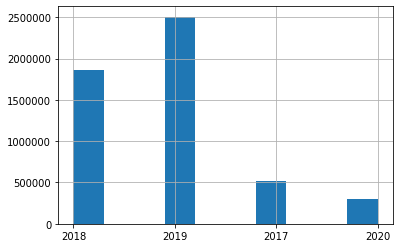

In [13]:
df.ride_year.hist()


* The year wise breakdown clearly shows that 2019 has the highest number of bike shares compared to 2017 and 2018. It will be interesting to forecast 2020 bike rides based on this available data.


### Month wise breakdown for each year

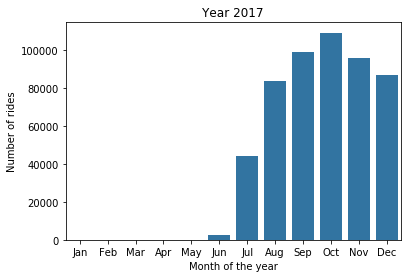

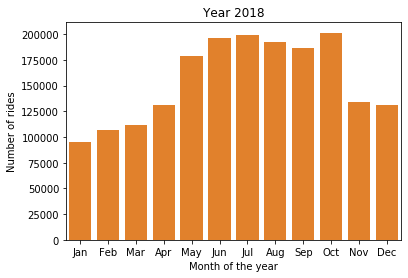

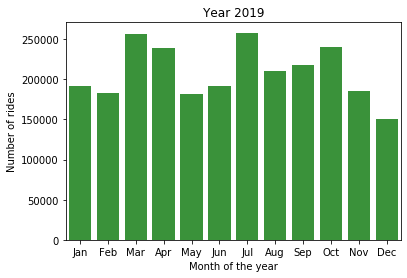

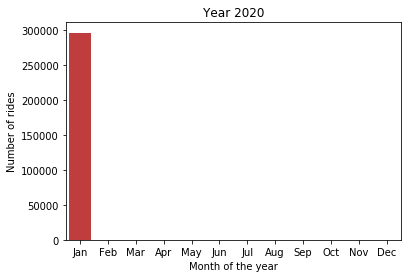

In [14]:

for year in range (2017, 2021):
    color = sb.color_palette()[year % 2017]
    year_data = df.query("ride_year == '{}'".format(year))
    sb.countplot(data = year_data, x = 'ride_month', order=sorted_months, color = color)
    plt.title("Year {}".format(year))
    plt.ylabel("Number of rides")
    plt.xlabel("Month of the year")
    plt.show()

* Month wise breakdown for each year clearly shows that 'October' seems to be a good month for bike rides across all years. This could be explained owing to the fact that october has fairly good weather in San francisco. 
* If we do an year by year breakdown its clear that in 2018 July and October seems to have peaked in bike rides owing to the good climate in summer and early autumn. 
* '2019' seems to follow the same trends with reagrds to july and october and also interestingly March and April months seems to have good numbers compared to 2018. As march and april marks the end of winters this could be the reason for these peaks.
* It is noteworthy to see that 2020 January has highest bike rides in comparision with bike rides in any given months in past years. We could deduce the incresing popularity of GoBike sharing app.



### Breakdown of rides by weekday

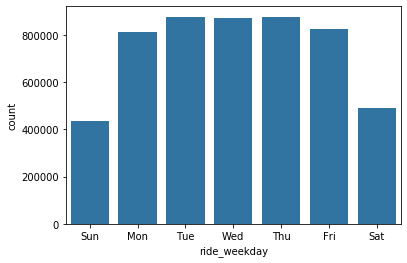

In [15]:
sb.countplot(data = df, x = 'ride_weekday', order = sorted_weekdays, color = sb.color_palette()[0])

TODO : Infrences from graph

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

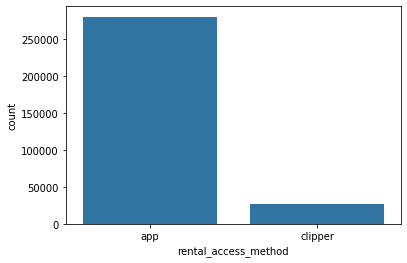

In [16]:
sb.countplot(data = df, x = 'rental_access_method', color = sb.color_palette()[0])

The `rental_access_method` is absent prior to 2019 and it seems that many users prefer app over the clipper card.

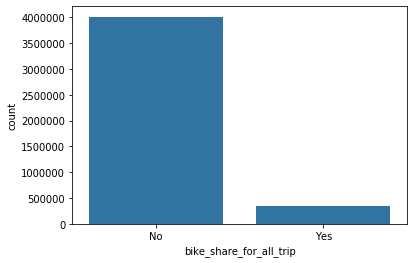

In [17]:
sb.countplot(data = df, x = 'bike_share_for_all_trip', color = sb.color_palette()[0])

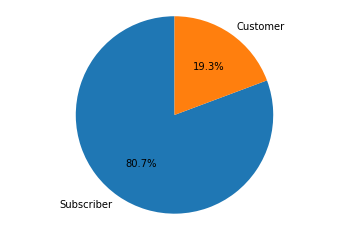

In [18]:
u = df.user_type.value_counts() * 100 / df.user_type.value_counts().sum()
plt.pie(u.values, labels = u.index, startangle = 90, autopct='%1.1f%%')
plt.axis("equal");

TODO observation

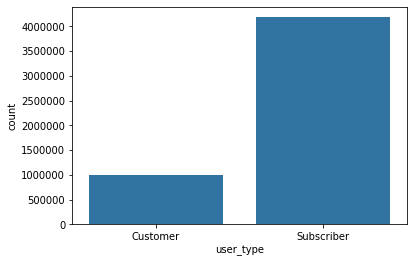

In [19]:
sb.countplot(data = df, x = 'user_type', color = sb.color_palette()[0])
plt.show()

In [20]:
df.query("duration_min == 15202")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,ride_year,ride_month,ride_weekday,ride_hour
4660474,912110,2019-12-19 23:15:36,2019-12-30 12:37:26,NaN,NaN,37.323757,-121.878614,NaN,NaN,37.327656,-121.868598,614329,Customer,NaN,app,15202,2019,Dec,Thu,23


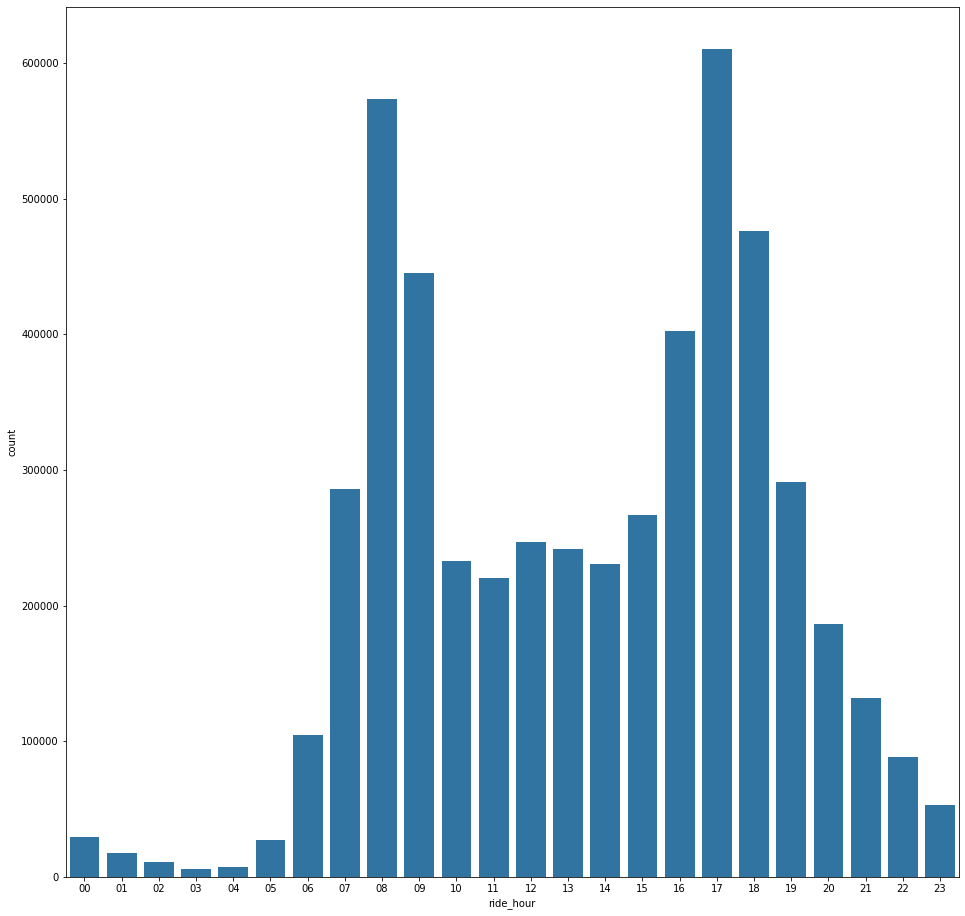

In [129]:
plt.figure(figsize=(16,16))
sb.countplot(data = df, x = 'ride_hour', color = sb.color_palette()[0])

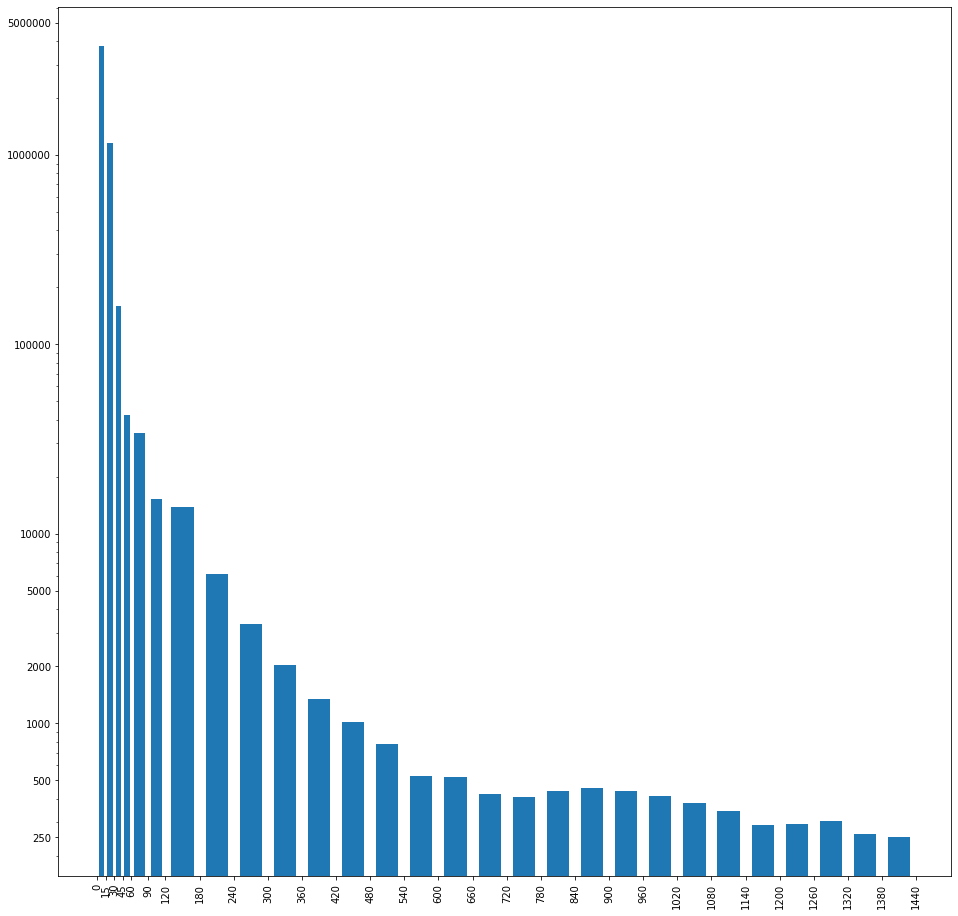

In [111]:
less_than_a_day = df.query('duration_min < 1440').duration_min
plt.figure(figsize=(16,16))
yticks = [ 250, 500, 1000, 2000, 5000, 10000, 100000, 1000000, 5000000]

xticks = [ 0, 15, 30, 45, 60, 90 ]
xticks.extend([*range(120, 1500, 60)])
plt.hist(less_than_a_day, bins = xticks, rwidth = 0.65)
plt.yscale('log')
plt.yticks(yticks, yticks);
plt.xticks(xticks, xticks, rotation=90);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

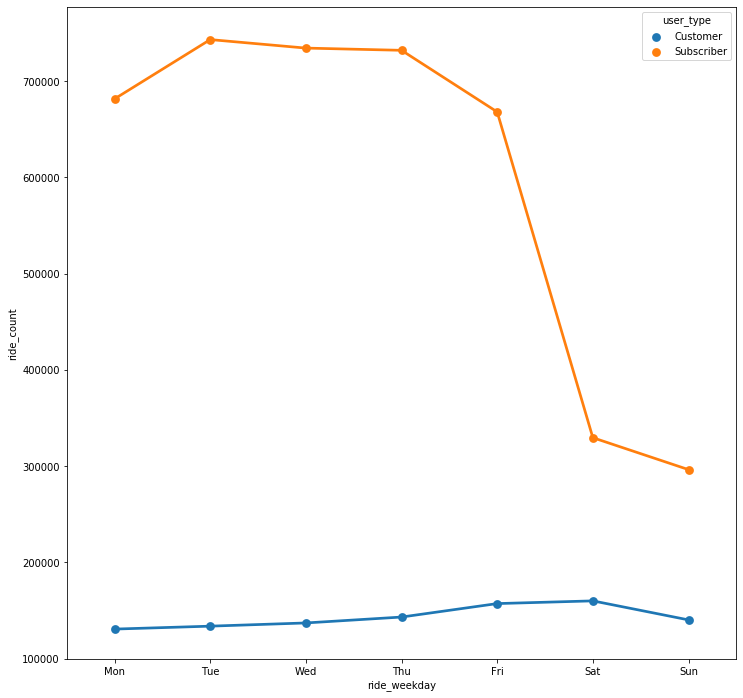

In [130]:
# Customer vs Subscriber on weekdays

user_weekday_rides = df.groupby(["ride_weekday", "user_type"]).size().reset_index()
user_weekday_rides.rename(columns = {0: 'ride_count'}, inplace=True)
plt.figure(figsize=(12,12))
sb.pointplot(x = 'ride_weekday', y = 'ride_count', hue = 'user_type', data = user_weekday_rides, order = sorted_weekdays);

<Figure size 864x864 with 0 Axes>

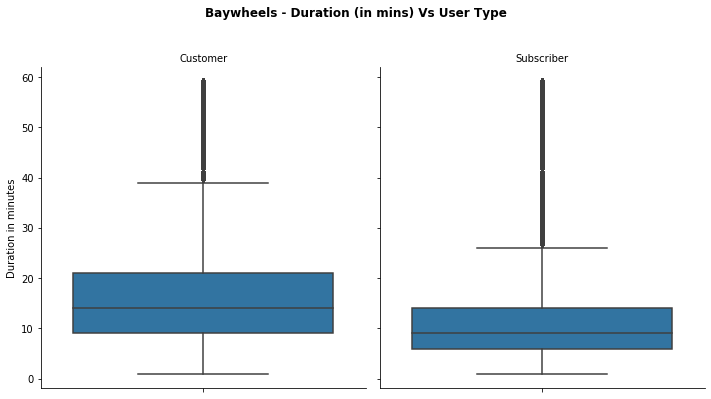

In [132]:
less_than_hour = df.query('duration_min < 60')

plt.figure(figsize=(12,12));
boxplot = sb.catplot(kind = 'box', data = less_than_hour, y = 'duration_min', col = 'user_type')
boxplot.set_axis_labels("", "Duration in minutes")
boxplot.fig.suptitle("Baywheels - Duration (in mins) Vs User Type", y = 1.1, fontweight = 'bold')
boxplot.set_titles(col_template = '{col_name}');

TODO

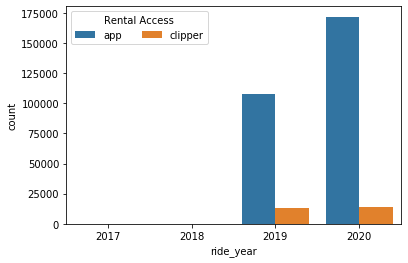

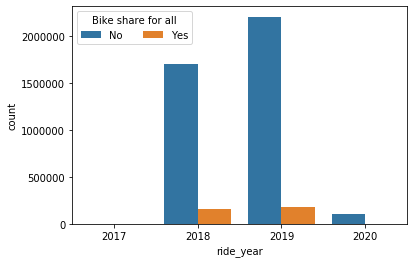

In [142]:
# bike_share_for_all_trip
g = sb.countplot(data = df, x = 'ride_year', hue = 'rental_access_method')
g.legend(loc = 'upper left', ncol = 2, title = 'Rental Access');

plt.show()

# bike_share_for_all_trip
b = sb.countplot(data = df, x = 'ride_year', hue = 'bike_share_for_all_trip')
b.legend(loc = 'upper left', ncol = 2, title = 'Bike share for all');

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

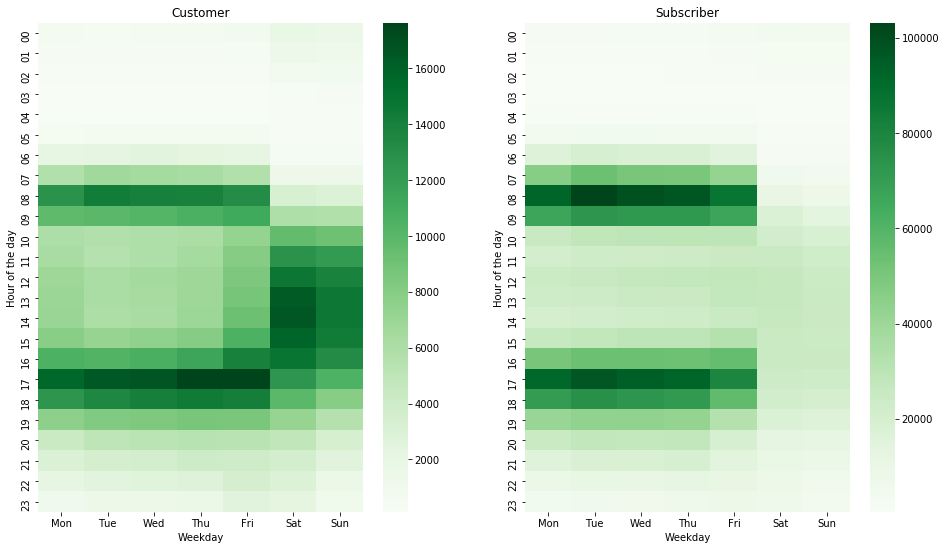

In [166]:
plt.figure(figsize=(16, 9))
graphs = [(1, 'Customer'), (2, 'Subscriber')]
for g in graphs:
    plt.subplot(1, 2, g[0])
    custs = df[df.user_type == g[1]].groupby(["ride_hour", "ride_weekday"]).size().reset_index()
    custs.rename(columns = {0: 'count'}, inplace=True)
    custs = custs.pivot(index = 'ride_hour', columns = 'ride_weekday', values = 'count')
    sb.heatmap(custs, cmap='Greens')
    plt.title(g[1])
    plt.xlabel("Weekday")
    plt.ylabel("Hour of the day")

<Figure size 1440x1440 with 0 Axes>

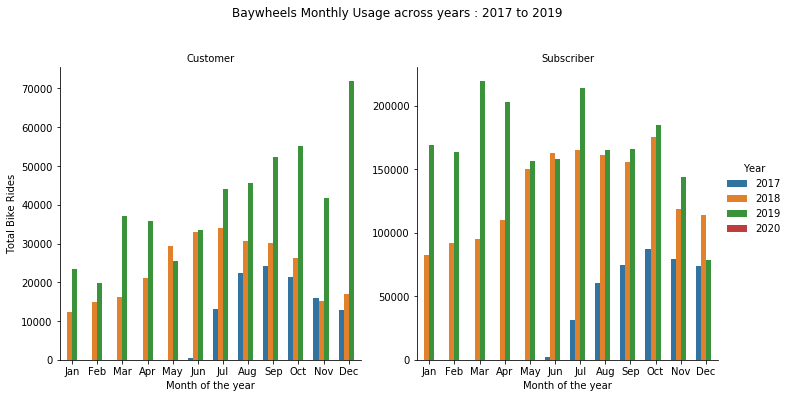

In [171]:
df_non_2020 = df.query('ride_year != "2020"')
plt.figure(figsize=(20, 20))
g = sb.catplot(data = df_non_2020, x = 'ride_month', col = 'user_type', hue = 'ride_year', sharey = False, kind = 'count')
g.set_axis_labels("Month of the year", "Total Bike Rides")
g.set_titles("{col_name}")
g._legend.set_title("Year")
plt.suptitle("Baywheels Monthly Usage across years : 2017 to 2019", y = 1.1);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!